### Xanthotoxin optimizations for the iJO1366 model

In [1]:
import cobra
from mewpy.optimization.evaluation import BPCY,WYIELD
from mewpy.problems import GOUProblem
from mewpy.problems import ROUProblem
from mewpy.problems import GKOProblem
from mewpy.problems import RKOProblem
from mewpy.simulation import SimulationMethod
from mewpy.simulation import SimulationMethod, get_simulator
import warnings
from mewpy.optimization import EA

Set parameter Username
Academic license - for non-commercial use only - expires 2022-12-11


In [2]:
model = cobra.io.read_sbml_model('iJO1366_new.xml')

In [3]:
BIOMASS_ID = 'BIOMASS_Ec_iJO1366_core_53p95M'
PRODUCT_ID = 'xanthotoxin_e'
O2 = 'EX_o2_e'
GLC = 'EX_glc__D_e'
envcond = {GLC: (-10.0, 100000.0), O2: (-1000,1000), BIOMASS_ID:(0.1,1000)}
model.objective = 'xanthotoxin_e'
model.objective.expression

evaluator_1 = BPCY(BIOMASS_ID, PRODUCT_ID, method = SimulationMethod.pFBA)
evaluator_2 = WYIELD(BIOMASS_ID, PRODUCT_ID,min_biomass_per=0.1)

In [4]:
simulation = get_simulator(model,envcond= envcond) 
res = simulation.simulate(method='pFBA')
print(res)

objective: 667.4520850433496
Status: OPTIMAL
Constraints: OrderedDict([('EX_glc__D_e', (-10.0, 100000.0)), ('EX_o2_e', (-1000, 1000)), ('BIOMASS_Ec_iJO1366_core_53p95M', (0.1, 1000))])
Method:pFBA


In [5]:
problem = GOUProblem(model,[evaluator_1,evaluator_2 ],envcond = envcond)
problem2 = ROUProblem(model,[evaluator_1,evaluator_2 ],envcond = envcond)
problem3 = GKOProblem(model,[evaluator_1,evaluator_2 ],envcond = envcond)
problem4 = RKOProblem(model,[evaluator_1,evaluator_2 ],envcond = envcond)

Running NSGAII


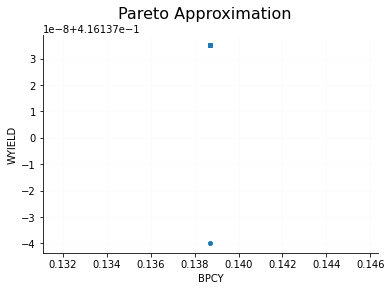

Eval(s)|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
    100|  0.000000  0.138712  0.030713  0.066414  0.067222|  0.000000  0.416137  0.092139  0.199242  0.201667|
    200|  0.130617  0.138712  0.138712  0.137523  0.002047|  0.391851  0.416137  0.416136  0.412569  0.006141|
    300|  0.138712  0.138712  0.138712  0.138712  0.000000|  0.416137  0.416137  0.416137  0.416137  0.000000|
    400|  0.138712  0.138712  0.138712  0.138712  0.000000|  0.416137  0.416137  0.416137  0.416137  0.000000|
    500|  0.138712  0.138712  0.138712  0.138712  0.000000|  0.416137  0.416137  0.416137  0.416137  0.000000|
    600|  0.138712  0.138712  0.138712  0.138712  0.000000|  0.416137  0.416137  0.416137  0.416137  0.000000|
    700|  0.138712  0.138712  0.138712  0.138712  0.000000|  0.416137  0.416137  0.416137  0.416137  0.000000|
    800|  0.138712  0.246015  0.138712  0.139785  0.010677|  0.369023  0.416137  0.416137  0.415666  0.004688|
 

In [6]:
%matplotlib inline
warnings.filterwarnings("ignore")

ea = EA(problem, max_generations= 50, mp = True, visualizer = True)
final_pop = ea.run()

In [18]:
df = ea.dataframe()
df.to_csv('GOU_50gen.csv')
print(df)

    Modification  Size      BPCY    WYIELD
0  {'b0774': 32}     1  0.000000  0.000000
1   {'b3857': 2}     1  0.246015  0.369023


Building modification target list.
Running NSGAII


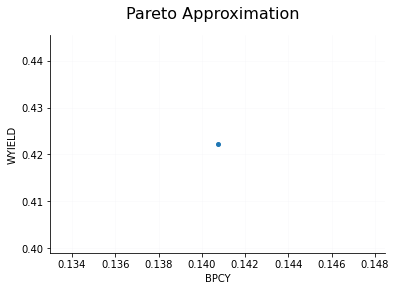

Eval(s)|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
    100|  0.000000  0.140736  0.138706  0.090148  0.063718|  0.000000  0.422208  0.416118  0.270443  0.191155|
    200|  0.138681  0.140736  0.138712  0.138732  0.000201|  0.416042  0.422208  0.416137  0.416196  0.000604|
    300|  0.138712  0.140736  0.138712  0.138753  0.000283|  0.416137  0.422208  0.416137  0.416258  0.000850|
    400|  0.138712  0.140736  0.138712  0.138854  0.000516|  0.416137  0.422208  0.416137  0.416562  0.001549|
    500|  0.138712  0.140736  0.138712  0.139077  0.000778|  0.416137  0.422208  0.416137  0.417230  0.002333|
    600|  0.138712  0.140736  0.139851  0.139727  0.001010|  0.416137  0.422208  0.419553  0.419180  0.003029|
    700|  0.140736  0.140736  0.140736  0.140736  0.000000|  0.422208  0.422208  0.422208  0.422208  0.000000|
    800|  0.140736  0.140736  0.140736  0.140736  0.000000|  0.422208  0.422208  0.422208  0.422208  0.000000|
 

In [9]:
%matplotlib inline
warnings.filterwarnings("ignore")

ea2 = EA(problem2, max_generations= 50, mp = True, visualizer = True)
final_pop2 = ea2.run()

In [19]:
df2 = ea2.dataframe()
df2.to_csv('ROU_50gen.csv')
print(df2)

                   Modification  Size      BPCY    WYIELD
0             {'ATPM': 0.03125}     1  0.140736  0.422208
1  {'ATPM': 0.03125, 'Ktex': 2}     2  0.250063  0.375094


  0%|          | 0/1369 [00:00<?, ?it/s]

Building modification target list.
Computing essential genes.


100%|██████████| 1369/1369 [02:20<00:00,  9.72it/s]


Running NSGAII


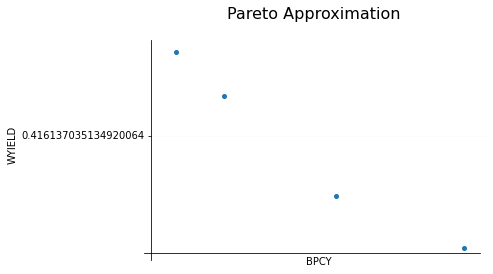

Eval(s)|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
    100|  0.000000  0.138712  0.138712  0.130823  0.021911|  0.000000  0.416137  0.416137  0.392468  0.065732|
    200|  0.138712  0.138712  0.138712  0.138712  0.000000|  0.416137  0.416137  0.416137  0.416137  0.000000|
    300|  0.138712  0.138712  0.138712  0.138712  0.000000|  0.416137  0.416137  0.416137  0.416137  0.000000|
    400|  0.138712  0.138712  0.138712  0.138712  0.000000|  0.416137  0.416137  0.416137  0.416137  0.000000|
    500|  0.138712  0.138712  0.138712  0.138712  0.000000|  0.416137  0.416137  0.416137  0.416137  0.000000|
    600|  0.138712  0.138712  0.138712  0.138712  0.000000|  0.416137  0.416137  0.416137  0.416137  0.000000|
    700|  0.138712  0.138712  0.138712  0.138712  0.000000|  0.416137  0.416137  0.416137  0.416137  0.000000|
    800|  0.138712  0.138712  0.138712  0.138712  0.000000|  0.416137  0.416137  0.416137  0.416137  0.000000|
 

In [12]:
%matplotlib inline
warnings.filterwarnings("ignore")

ea3 = EA(problem3, max_generations= 50, mp = True, visualizer = True)
final_pop3 = ea3.run()

In [20]:
df3 = ea3.dataframe()
df3.to_csv('GKO_50gen.csv')
print(df3)

  Modification  Size      BPCY    WYIELD
0           {}     0  0.138712  0.416137


  0%|          | 0/2600 [00:00<?, ?it/s]

Building modification target list.
Computing essential reactions


100%|██████████| 2600/2600 [03:25<00:00, 12.64it/s]


Running NSGAII


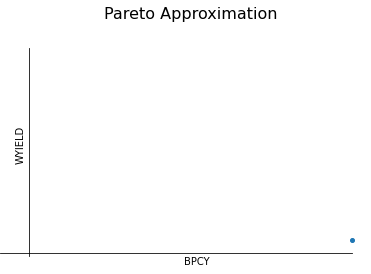

Eval(s)|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
    100|  0.021106  0.140736  0.138712  0.137243  0.011817|  0.063318  0.422208  0.416137  0.411730  0.035451|
    200|  0.138712  0.140736  0.138712  0.138773  0.000345|  0.416137  0.422208  0.416137  0.416319  0.001036|
    300|  0.138712  0.140736  0.138712  0.138874  0.000549|  0.416137  0.422208  0.416137  0.416623  0.001647|
    400|  0.138712  0.140736  0.138712  0.139097  0.000794|  0.416137  0.422208  0.416137  0.417291  0.002382|
    500|  0.138712  0.140736  0.138712  0.139664  0.001010|  0.416137  0.422208  0.416137  0.418991  0.003030|
    600|  0.140736  0.140736  0.140736  0.140736  0.000000|  0.422208  0.422208  0.422208  0.422208  0.000000|
    700|  0.140736  0.140736  0.140736  0.140736  0.000000|  0.422208  0.422208  0.422208  0.422208  0.000000|
    800|  0.140736  0.140736  0.140736  0.140736  0.000000|  0.422208  0.422208  0.422208  0.422208  0.000000|
 

In [15]:
%matplotlib inline
warnings.filterwarnings("ignore")

ea4 = EA(problem4, max_generations= 50, mp = True, visualizer = True)
final_pop4 = ea4.run()

In [21]:
df4 = ea4.dataframe()
df4.to_csv('RKO_50gen.csv')
print(df4)

  Modification  Size      BPCY    WYIELD
0  {'ATPM': 0}     1  0.140736  0.422208
